### Importação das bibliotecas

In [73]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from joblib import dump, load
from graphviz import Graph, Digraph
import numpy as np
import pandas as pd
import graphviz

### Tratamento dos dados

In [95]:
# Definimos o ssed dos valores aleatórios para 25
np.random.seed(25)

# Importamos os dados do dataset
arquivo = pd.read_csv('drug200.csv')

# Mapeamos as conversões de nomes e valores do dataset
rename_columns = {
    "Age" : "Idade",
    "Sex" : "Sexo",
    "BP" : "PS",
    "Cholesterol" : "Colesterol",
    "Na_to_K" : "Sodio_Potassio",
    "Drug" : "Remédio"
}

rename_classes = {
    "drugA" : "A",
    "drugB" : "B",
    "drugC" : "C",
    "drugX" : "X",
    "DrugY" : "Y",
}

rename_sexo = {
    "F" : 0,
    "M" : 1
}

rename_levels = {
    "LOW" : 1,
    "NORMAL" : 2,
    "HIGH" : 3,
}

# Renomeamos as colunas para português
arquivo = arquivo.rename(columns=rename_columns)

# Convertemos os valores textuais para numéricos
arquivo.loc[:, "Sexo"] = arquivo.loc[:, "Sexo"].map(rename_sexo)
arquivo.loc[:, "PS"] = arquivo.loc[:, "PS"].map(rename_levels)
arquivo.loc[:, "Colesterol"] = arquivo.loc[:, "Colesterol"].map(rename_levels)
arquivo.loc[:, "Remédio"] = arquivo.loc[:, "Remédio"].map(rename_classes)

# Atribuímos as variáveis para X e a classe para Y
x = arquivo[["Idade", "Sexo", "PS", "Sodio_Potassio", "Colesterol"]]

# Normalizamos os dados numéricos
# scaler = MinMaxScaler()
# colunas_numeircas = x[["Idade", "PS", "Sodio_Potassio", "Colesterol"]].values
# dados_normalizados = scaler.fit_transform(colunas_numeircas)
# x[["Idade", "PS", "Sodio_Potassio", "Colesterol"]] = dados_normalizados

y = arquivo["Remédio"]

x.head()


C:\Users\annal\AppData\Local\Temp\ipykernel_7640\1571368895.py:40: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  arquivo.loc[:, "Sexo"] = arquivo.loc[:, "Sexo"].map(rename_sexo)
C:\Users\annal\AppData\Local\Temp\ipykernel_7640\1571368895.py:41: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  arquivo.loc[:, "PS"] = arquivo.loc[:, "PS"].map(rename_levels)
C:\Users\annal\AppData\Local\Temp\ipykernel_7640\1571368895.py:42: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always s

,Idade,Sexo,PS,Sodio_Potassio,Colesterol
0,23,0,3,25.355,3
1,47,1,1,13.093,3
2,47,1,1,10.114,3
3,28,0,2,7.798,3
4,61,0,1,18.043,3


### Treinamento do modelo e medida de acurácia

In [ ]:
# Separamos o treino e o teste para as variáveis e para o alvo
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, stratify=y)

# Geramos a árvore de decisão utilizando gini como critério de cálculo de IG
clf = tree.DecisionTreeClassifier(criterion="gini")

#Treinamos o modelo utilizando treino X e treino Y
clf.fit(train_x, train_y)

# Predizemos o conteúdo do teste X
predict = clf.predict(test_x)
# print(predict)

# Calculamos a ácurácia comparando a predição realizada com os valores reais de teste Y
acuracia = accuracy_score(test_y, predict)
print("A acurácio foi de " + str(acuracia * 100) + "%")

# Salvamos o modelo treinado em um arquivo
dump(clf, 'modelo_dd.joblib')

# Carregamos o modelo
modelo = load('modelo_dd.joblib')
predict1 = modelo.predict([[0.7, 0.2, 0.2, 0.2, 0.6]])
print("A predição para a pessoa inserida foi: " + str(predict1[0]))

# print(classification_report(test_y, predict))

tree.plot_tree(clf, feature_names=x.columns, class_names=["A", "B", "C", "X", "Y"], filled=True)
# dot_data = tree.export_graphviz(clf, out_file=None, feature_names=x.columns, class_names=["A", "B", "C", "X", "Y"], filled=True, rounded=True, special_characters=True)
# graph = graphviz.Source(dot_data)
# x.head()

(array([28., 53., 38., 26., 15., 11., 14.,  6.,  6.,  3.]),
 array([ 6.269 ,  9.4668, 12.6646, 15.8624, 19.0602, 22.258 , 25.4558,
        28.6536, 31.8514, 35.0492, 38.247 ]),
 <BarContainer object of 10 artists>)

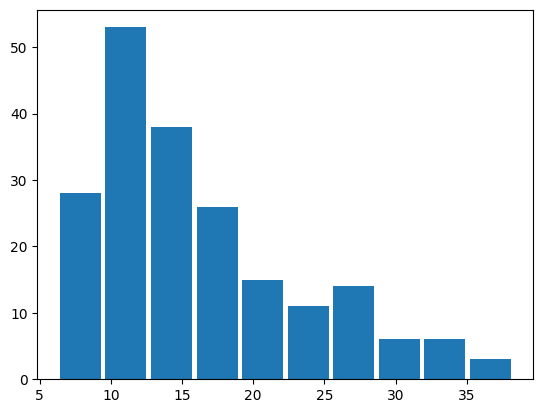

In [104]:
# plt.hist(x["Idade"], rwidth=0.9)
plt.hist(x["Sodio_Potassio"], rwidth=0.9)